# Finding Features

24/02/2022


In this notebook I will write a code for spotting the features in the movement of the rat.  
I intend to use `DeepEthogram` package.


**TODO:**
- make it save the names as `labels.csv`
- download the right model
- find out how to make predictions based on that model
- write a complete code (in `cv_script.py`) which you can run
- update the script so that you can insert variables and run from anywhere (?)
- try using `- []` as checkboxes
- go on to the next stuff I have to do (talk to Rafi)

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
import os
from deepethogram import projects

Populating the interactive namespace from numpy and matplotlib


## create a project

In [2]:
# this is a path to a base directory on your hard drive
# this is just an example! change this to whereever you want, e.g. 'C:\DATA\movies`
data_path = './videos/examples'

# pick a project name
project_name = 'testing_project'

# make a list of behaviors. try to choose your behaviors carefully! 
# you'll have to re-train all your models if you add or remove behaviors. 
# behaviors = ['background', 'groom', 'locomote', 'freezing']
behaviors = ['background', 'sniffing', 'drinking', 'nose casting']

# this will create a folder called /mnt/DATA/open_field_deepethogram
# there will be subdirectories called DATA and models
# there will also be a project_config.yaml
project_config = projects.initialize_project(data_path, project_name, behaviors)

## label videos

In [3]:
import cv2
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

In [4]:
def video_to_frames(video_path, frames_path, video_name=None, include_video_name=False):
    # create filename if doesn't exist and capture whole video
    if video_name == None:
        video_name = video_path.split('/')[-1].split('.')[0]
    vidcap = cv2.VideoCapture(video_path)
    os.makedirs(frames_path, exist_ok=True)
    count = 0
    
    # make sure the video wasn't extracted already
    success, image = vidcap.read()
    frame_name = f"{frames_path}\\{video_name}_frame{count}.jpg" if include_video_name else f"{frames_path}\\frame{count}.jpg"
    if os.path.exists(frame_name):
        raise Exception('the video was already extracted')
    
    # write all frames to images
    while success:
        frame_name = f"{frames_path}\\{video_name}_frame{count}.jpg" if include_video_name else f"{frames_path}\\frame{count}.jpg"
        s = cv2.imwrite(frame_name, image)
        if not s:
            raise Exception(f'frame {count} was not written')
        success, image = vidcap.read()
        count += 1

### Odor22

In [5]:
videos_list = []
labels_list = []

In [6]:
video_path = './videos/examples/odor22.avi'
videos_list.append(video_path)
vs = cv2.VideoCapture(video_path)
frames = []

while True:
    frames.append(vs.read()[1])
    if frames[-1] is None:
        break

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


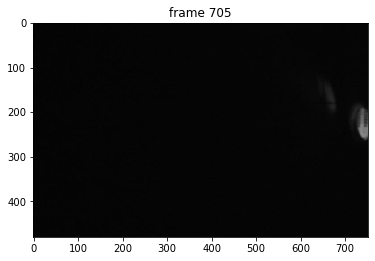

In [7]:
x, x0, fps = 0, 2, 15
duration = len(frames) // fps
last_frame = x0 + fps * duration
fig, ax = plt.subplots()

def make_frame(t):
    global x
    ax.clear()

    ax.imshow(frames[x], cmap='gray', interpolation='nearest')
    ax.set_title(f'frame {x}')
    x += 1
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
animation.ipython_display(fps=fps, loop=True, autoplay=True)

In [8]:
features = {}
for i in range(len(frames)):
    features[i] = np.zeros(len(behaviors))
    if i in range(360, 416):
        features[i][1] = 1
    elif i in range(440, 551):
        features[i][2] = 1
    elif i in range(550, 581):
        features[i][3] = 1
    else:
        features[i][0] = 1

In [9]:
labels_filename = './videos/examples/odor22_features.csv'
pandas.DataFrame(features, index=behaviors).T.to_csv(labels_filename)
labels_list.append(labels_filename)

### Odor28

In [10]:
video_path = './videos/examples/odor28.avi'
videos_list.append(video_path)
vs = cv2.VideoCapture(video_path)
frames = []

while True:
    frames.append(vs.read()[1])
    if frames[-1] is None:
        break

t:   0%|▎                                                                    | 2/510 [00:00<00:33, 15.38it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


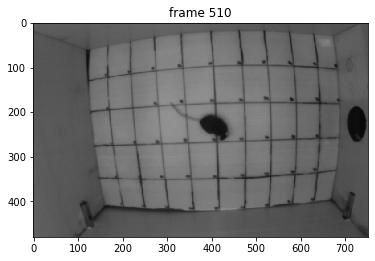

In [11]:
x, x0, fps = 0, 2, 15
duration = len(frames) // fps
last_frame = x0 + fps * duration
fig, ax = plt.subplots()

def make_frame(t):
    global x
    ax.clear()

    ax.imshow(frames[x], cmap='gray', interpolation='nearest')
    ax.set_title(f'frame {x}')
    x += 1
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
animation.ipython_display(fps=fps, loop=True, autoplay=True)

In [12]:
features = {}
for i in range(len(frames)):
    features[i] = np.zeros(len(behaviors))
    if i in range(360, 481):
        features[i][2] = 1
    else:
        features[i][0] = 1

In [13]:
labels_filename = './videos/examples/odor28_features.csv'
pandas.DataFrame(features, index=behaviors).T.to_csv(labels_filename)
labels_list.append(labels_filename)

### Odor6

In [14]:
video_path = './videos/examples/odor6.avi'
videos_list.append(video_path)
vs = cv2.VideoCapture(video_path)
frames = []

while True:
    frames.append(vs.read()[1])
    if frames[-1] is None:
        break

t:   0%|▏                                                                    | 2/585 [00:00<00:30, 19.42it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


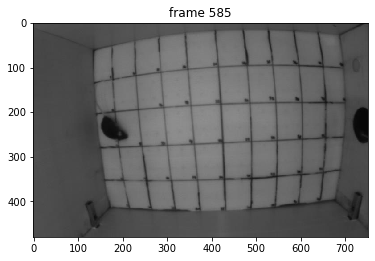

In [15]:
x, x0, fps = 0, 2, 15
duration = len(frames) // fps
last_frame = x0 + fps * duration
fig, ax = plt.subplots()

def make_frame(t):
    global x
    ax.clear()

    ax.imshow(frames[x], cmap='gray', interpolation='nearest')
    ax.set_title(f'frame {x}')
    x += 1
    return mplfig_to_npimage(fig)

animation = VideoClip(make_frame, duration=duration)
animation.ipython_display(fps=fps, loop=True, autoplay=True)

In [16]:
features = {}
for i in range(len(frames)):
    features[i] = np.zeros(len(behaviors))
    if i in range(320, 391):
        features[i][2] = 1
    elif i in range(390, 421):
        features[i][3] = 1
    elif i in range(460, 520):
        features[i][2] = 1
    else:
        features[i][0] = 1

In [17]:
labels_filename = './videos/examples/odor6_features.csv'
pandas.DataFrame(features, index=behaviors).T.to_csv(labels_filename)
labels_list.append(labels_filename)

## add labels

In [ ]:
# data_path = './videos/examples'

In [19]:
# adding videos
list_of_movies = videos_list
mode = 'copy' # or 'symlink' or 'move'

# depending on the mode, it will copy, symlink, or move each video file
# it will also compute the mean and standard deviation of each RGB channel
for movie_path in list_of_movies:
    projects.add_video_to_project(project_config, movie_path, mode=mode)


# now, we have our new movie files properly in our deepethogram project
new_list_of_movies = [v[:18] + 'testing_project_deepethogram/DATA/' + v.split("/")[-1].split('.')[0]
                                                              + '/' + v.split("/")[-1] for v in videos_list]

# we also have a list of label files, created by some other means
list_of_labels = labels_list

for movie_path, label_path in zip(new_list_of_movies, list_of_labels):
    projects.add_label_to_project(label_path, movie_path)

ValueError: Directory odor22 already exists in your data dir! Please rename the video to a unique name

In [ ]:
# ls videos/examples/testing_project_deepethogram/project_config.yaml

In [ ]:
!python -m deepethogram.flow_generator.train project.config_file=C:\Users\buein\OneDrive - Bar-Ilan University\שנה ג\פרוייקט שנתי\mouse_tracking\cv\videos\examples\testing_project_deepethogram\project_config.yaml flow_generator.arch=MotionNet compute.batch_size=16

## installations

In [126]:
%pip install --upgrade deepethogram
# this is for pytorch lightning compatibility
%pip uninstall -y torchtext

In [128]:
import logging
import multiprocessing
import os
import random

# from google.colab import drive
import h5py
# not used in DeepEthogram; only to easily show plots
from IPython.display import Image
from omegaconf import OmegaConf
import pandas as pd
import torch

from deepethogram import configuration, postprocessing, projects, utils
from deepethogram.debug import print_dataset_info
from deepethogram.flow_generator.train import flow_generator_train
from deepethogram.feature_extractor.train import feature_extractor_train
from deepethogram.feature_extractor.inference import feature_extractor_inference
from deepethogram.sequence.train import sequence_train
from deepethogram.sequence.inference import sequence_inference

In [131]:
# Make sure we actually have a GPU
print(torch.__version__)
print('gpu available: {}'.format(torch.cuda.is_available()))
# print('gpu name: {}'.format(torch.cuda.get_device_name(0)))

# assert torch.cuda.is_available(), 'Please select a GPU runtime and then restart!'

1.10.0+cpu
gpu available: False


In [135]:
project_path = './videos/examples/testing_project_deepethogram'
files = os.listdir(project_path)
assert 'DATA' in files, 'DATA directory not found! {}'.format(files)
assert 'models' in files, 'models directory not found! {}'.format(files)
assert 'project_config.yaml' in files, 'project config not found! {}'.format(files)

In [137]:
def reset_logger():
    # First, overwrite any logger so that we can actually see log statements
    # https://stackoverflow.com/questions/13839554/how-to-change-filehandle-with-python-logging-on-the-fly-with-different-classes-a
    log = logging.getLogger()  # root logger
    log.setLevel(logging.INFO)
    for hdlr in log.handlers[:]:  # remove all old handlers
        log.removeHandler(hdlr)
    log.addHandler(logging.StreamHandler())
    return log

In [145]:
log = reset_logger()

print_dataset_info(os.path.join(project_path, 'DATA'))

FileNotFoundError: [WinError 3] The system cannot find the path specified: './videos/examples/testing_project_deepethogram\\DATA\\./videos/examples/testing_project_deepethogram\\DATA\\odor22'

In [141]:
os.path.join(project_path, 'DATA')

'./videos/examples/testing_project_deepethogram\\DATA'